# I. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## A redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \approx 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ij} X_{ik} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét. Ehelyett egy gyakran használt, egyszerűbb, de igen hasznos eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az illesztést a mérési adatok egy véletlen részhalmazára (pl. egyharmadára) végezzük el, majd egy másik véletlen részhalmazt választunk, mellyel ismét elvégezzük az illesztést, és így tovább. Kellően sokszor megismételve az eljárást az illesztési paraméterekre egy-egy eloszlást kapunk, melyeknek meghatározhatjuk a várható értékét, szórását és kovarianciáit. A legjobban illeszkedő modellparamétereknek tekinthetjük az eloszlások várható értékét, míg illesztési hibának a szórásukat.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## 1. feladat

Az alábbi függvény egy véletlenszerű adatsort generál. Írjunk rövid programot, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a programot, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen! Számítsuk ki a legjobban illeszkedő modell esetében a redukált $\chi^2$ értékét!

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def some_random_coeffs():
    a = 10 * np.random.rand() - 2.5
    b = 20 * np.random.rand() - 5
    c = 100 * np.random.rand() - 50
    return a, b, c

def some_random_data(a, b, c, N):
    x = np.linspace(-N, N, 2 * N + 1)
    sigma = 10 * (np.random.rand(x.shape[0]) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    return x, y, sigma

def random_data_with_outliers(a, b, c, N, M):
    x, y, sigma = some_random_data(a, b, c, N)
    idx = np.random.randint(0, 2 * N, M)
    y[idx] = np.min(y) + np.random.rand() * (np.max(y) - np.min(y))
    return x, y, sigma

In [5]:
a, b, c = some_random_coeffs()
x, y, sigma = some_random_data(a, b, c, 10)
np.savetxt('adatsor.txt', np.transpose([x, y, sigma]))
print(x)
print(y)
print(sigma)

print(a)
print(b)
print(c)


[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]
[ 452.60407387  354.99352888  264.05630374  198.6417144   146.28339444
  103.40931658   48.93320022   27.10807506  -10.62161004  -12.32559819
  -29.84330788  -38.56382198  -16.66389384   23.11804378   88.31661502
  102.97972812  163.27166164  249.58003359  345.07458151  399.89715945
  531.94022536]
[ 12.20071439  15.4120846   17.60085662  19.54674873  15.3623668
  15.48919332  10.37176875  19.49003164  13.92495903  12.75628163
  19.32943113  14.16931301  19.65887797  17.71647175  14.13902186
  15.77253915  14.36418014  14.64073147  11.83012033  14.85005148
  18.92398582]
5.117093781231802
3.4548451413990477
-20.386330412308418


<ErrorbarContainer object of 3 artists>

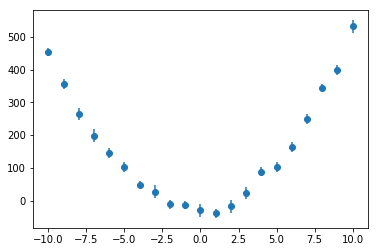

In [6]:
# ábra a mérési pontokkal és hibaintervallumokkal

plt.errorbar(x, y, sigma,linestyle=' ', marker="o")

In [7]:
# az illesztést elvégző program helye

b = np.vstack((y/sigma))
X = np.vstack([x**i for i in range(0, 3)])
b.T
Y=X/sigma
Y.T



print(b.shape)
print(b.T.shape)
print(X.shape)
print(X.T.shape)

a=solve(matmul(Y,Y.T),matmul(Y,b))
print(a)

def fit(x, a):
    return a[0] + a[1]*x + a[2]*x*x

(21, 1)
(1, 21)
(3, 21)
(21, 3)
[[-24.60142516]
 [  3.16091885]
 [  5.10657434]]


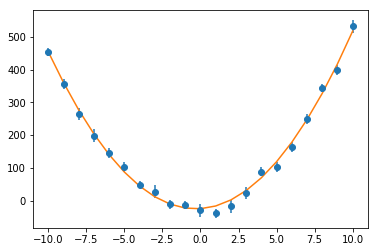

In [8]:
# ábra a legjobban illeszkedő modellel

plt.errorbar(x, y, sigma,linestyle=' ', marker="o")
plt.plot(x,fit(x,a))


In [9]:
# a redukált chi^2 értéke a legjobban illeszkedő modell esetére

khi2 = (matmul(Y.T,a)-b)**2
i=0
while i<1:
    khi2erteke = sum(sqrt(khi2[i]**2+khi2[i+1]**2+khi2[i+2]**2+khi2[i+3]**2+khi2[i+4]**2+khi2[i+5]**2+khi2[i+6]**2+khi2[i+7]**2+khi2[i+8]**2+khi2[i+9]**2+khi2[i+10]**2+khi2[i+11]**2+khi2[i+12]**2+khi2[i+13]**2+khi2[i+14]**2+khi2[i+15]**2+khi2[i+16]**2+khi2[i+17]**2+khi2[i+18]**2+khi2[i+19]**2+khi2[i+20]**2))
    print("khi^2 =", khi2erteke)
    i+=1

khir = khi2erteke/(21-3)
print("khi^2 redukált =", khir)

khi^2 = 4.64901521435
khi^2 redukált = 0.25827862302


## 2. feladat

Az alábbi függvényhívás olyan adatsort generál, amely kilógó (a megadott hibaértékkel nem jól jellemzett, vagy sok szigma értékkel eltérő) adatpontokat is tartalmaz. Írjunk programot, mely a $3\sigma$-nál jobban kilógó pontok elhagyásával, két lépésben, illetve iteratív módon végzi el a parabolaillesztést!

In [43]:
a, b, c = some_random_coeffs()
x, y, sigma = random_data_with_outliers(a, b, c, 10, 3)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[-236.92790767 -183.5077474    -4.70474135 -152.70458856 -108.80418566
  -79.63023784  -54.91060622  -25.60124281  -15.41563592   -1.30906273
   29.61889862   -4.70474135   59.10535385   76.52032419   73.13900623
   36.76975603   63.11228      80.07655444   70.08320451   52.8956767
   55.22490912]
[11.30044411 15.82048742 16.55036961 19.71051771 19.73336858 10.32956134
 16.86615765 10.24212629 18.50104655 11.88566973 11.22638611 18.84433873
 12.04997684 12.94807961 14.92348172 18.96831065 10.20868296 12.38903476
 17.94758014 11.61322819 15.91356509]
(21, 1)
(1, 21)
(3, 21)
(21, 3)
[[24.4180791 ]
 [13.28377937]
 [-1.0208812 ]]


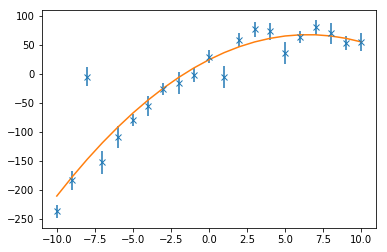

In [44]:
errorbar(x, y, sigma, linestyle=" ", marker="x")

b = np.vstack((y/sigma))
X = np.vstack([x**i for i in range(0, 3)])
b.T
Y=X/sigma
Y.T

print(x)
print(y)
print(sigma)
print(b.shape)
print(b.T.shape)
print(X.shape)
print(X.T.shape)

a=solve(matmul(Y,Y.T),matmul(Y,b))
print(a)

def fit(x, a):
    return a[0] + a[1]*x + a[2]*x*x

plot(x,fit(x,a))

In [45]:
print(y[y<y-(3*sigma)])
print(y)

[]
[-236.92790767 -183.5077474    -4.70474135 -152.70458856 -108.80418566
  -79.63023784  -54.91060622  -25.60124281  -15.41563592   -1.30906273
   29.61889862   -4.70474135   59.10535385   76.52032419   73.13900623
   36.76975603   63.11228      80.07655444   70.08320451   52.8956767
   55.22490912]


## 3. feladat

Írjuk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

In [9]:
# a szórások és aszimptotikus hibák meghatározása

## 4. feladat

Határozzuk meg a kilógó pontokat is tartalmazó adatsor esetében az illesztett parabola paramétereinek eloszlását és hibáját a bootstrap módszer segítségével. A bootstrap eljárás során az illesztést többször megismételjük oly módon, hogy mindig csak a mérési pontok egy véletlen részhalmazát (pl. 60%-át) használjuk fel az illesztéshez. Az így kapott illesztési paraméterekből készítsünk hisztogramot, valamint számítsuk ki a paraméterek várható értékét és szórását! Hasonlítsuk össze a kapott értékeket a kovarianciamátrixból számolt aszimptotikus hibával.

In [10]:
# a bootstrap módszer megvalósítása

In [11]:
# a bootstrap módszerrel kapott illesztési paraméterek eloszlása -- ábrák

In [12]:
# a várható értékek, szórások és kovarianciák meghatározása

## 5. feladat

A mellékelt fájlok olyan adatokat tartalmaznak, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével. A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja $k$ változó egész kitevőjű hatványainak szorzata. A többváltozós polinom fokszámát az a tag adja, melyben a hatványkitevők összege maximális. Például a

$$
p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3
$$

háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztés elvégzése után határozzuk meg az illesztési paraméterek hibáit, és keressünk módot arra, hogy miként ábrázolható a többváltozós illesztés jósága!

Adatfájlok:
    
* [small.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/small.dat.gz)
* [big.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/big.dat.gz)

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba

In [13]:
# többváltozós illesztés